pca ratio
[ 0.371   0.2194  0.1746]
[[-0.3794 -0.195  -0.1091]
 [ 0.1495  0.8152 -0.2017]
 [ 1.0351 -0.3046 -0.0301]
 [-0.1395  0.0753  0.7397]
 [-0.383  -0.1938 -0.1042]
 [-0.2826 -0.1971 -0.2945]]


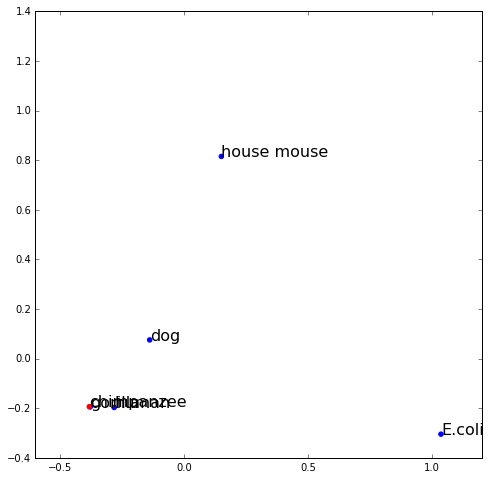

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()


from glob import glob

from scipy.misc import imread
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

from kernel import kernel
from clean import cleanKS
np.set_printoptions(precision=4)

interest = ['11691', '25571','7057','28918','4242','28814']
cleanKS(interest)


path = 'ks/cleaned/*.ks'
files = [i.replace('\\','/') for i in glob(path)]

genomeIDs = [f.split('/')[-1].split('.')[0].split('_') for f in files]
genomeIDs = set(np.array(genomeIDs).ravel())
genomeIDs = [int(g) for g in genomeIDs]


#print genomeIDs

x = pd.DataFrame(columns=genomeIDs, index=genomeIDs, data=0.0)

for f in files:
    #print '_'*60
    #print f
    genA, genB = f.split('/')[-1].split('.')[0].split('_')
    genA, genB = int(genA), int(genB)
    ki = kernel(f, sigma=1)
    #print ki
    x[genA][genB] = ki
    x[genB][genA] = ki

genomeNames = pd.read_csv('ks/tags.txt',
                         index_col = 'id')

for i in genomeIDs:
    x[i][i] = 1
    
#print x

pca = PCA(n_components=3)
pca.fit(x)
print 'pca ratio'
print pca.explained_variance_ratio_

xCap = pca.transform(x)
print xCap
'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(list(xCap[:,0]),list(xCap[:,1]),list(xCap[:,2]), color = 'bbbbrb')
for pt,gID in zip(xCap, genomeIDs):
    ax.text(pt[0],pt[1],pt[2],genomeNames['tag'][gID])
limit = np.max(np.abs(xCap))
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit)
ax.set_zlim(-limit, limit)
ax.set_xlabel('1st')
ax.set_ylabel('2nd')
ax.set_zlabel('3rd')'''

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(list(xCap[:,0]),list(xCap[:,1]), color='bbbbrb')
ax.axis('square')
for pt,gID in zip(xCap, genomeIDs):
    ax.text(pt[0],pt[1],genomeNames['tag'][gID],fontsize=16)



##plt.savefig("test.svg")
plt.show()
